In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
tqdm.pandas()

df = pd.read_csv('./data/October_November_missions_full.csv')
df = df[~df['missionCatalog_id'].isin(['f1455712-fa2b-4feb-b7f9-ab8ddfa29e8d', 'd090d147-1ac9-4963-9c2b-1f5e663bad44'])]

df.rename(columns={'sub': 'user'}, inplace=True)
df['mission'] = df['kind'] + '_' + df['TARGET'].astype(str)

df = df[['user', 'mission', 'createdAt', 'kind', 'TARGET', 'performance']]
df['createdAt'] = pd.to_datetime(df['createdAt'])
df['user'] = df['user'].astype('category').cat.codes
df['mission'] = df['mission'].astype('category')
df['kind'] = df['kind'].astype('category')

df.sort_values(by=['createdAt', 'user'], inplace=True, ignore_index=True)
df

,user,mission,createdAt,kind,TARGET,performance
0,0,episode_4,2024-10-02 00:00:00+00:00,episode,4,0.25
1,0,activity_4,2024-10-02 00:00:00+00:00,activity,4,1.50
2,2,activity_7,2024-10-02 00:00:00+00:00,activity,7,0.00
3,2,exp_100,2024-10-02 00:00:00+00:00,exp,100,0.00
4,2,mobility_1,2024-10-02 00:00:00+00:00,mobility,1,0.00
...,...,...,...,...,...,...
181722,11208,activity_8,2024-11-30 00:00:00+00:00,activity,8,0.00
181723,11208,quiz_3,2024-11-30 00:00:00+00:00,quiz,3,0.00
181724,11232,activity_3,2024-11-30 00:00:00+00:00,activity,3,0.00
181725,11232,episode_5,2024-11-30 00:00:00+00:00,episode,5,0.00


In [2]:
n_users = df['user'].nunique()
n_missions = df['mission'].nunique()

print(f'Number of users: {n_users}')
print(f'Number of missions: {n_missions}')

print(df['kind'].cat.categories)

Number of users: 11247
Number of missions: 30
Index(['action', 'activity', 'episode', 'exp', 'mobility', 'quiz'], dtype='object')


<Axes: xlabel='mission'>

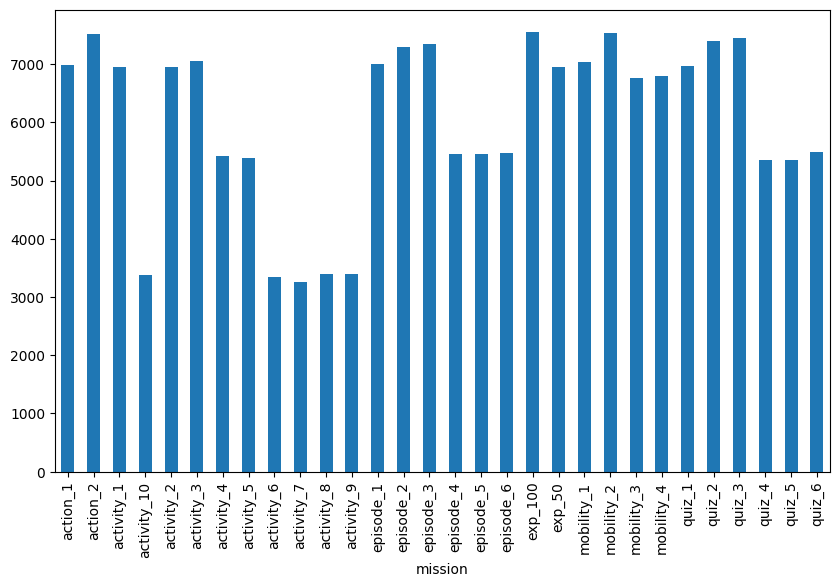

In [3]:
plt.figure(figsize=(10, 6))

df.groupby('mission', observed=True).size().plot(kind='bar')

<Axes: ylabel='count'>

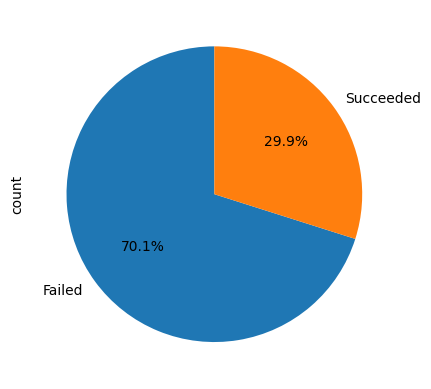

In [4]:
df['performance'].apply(lambda x: x >= 1).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Failed', 'Succeeded'])

<Axes: xlabel='kind'>

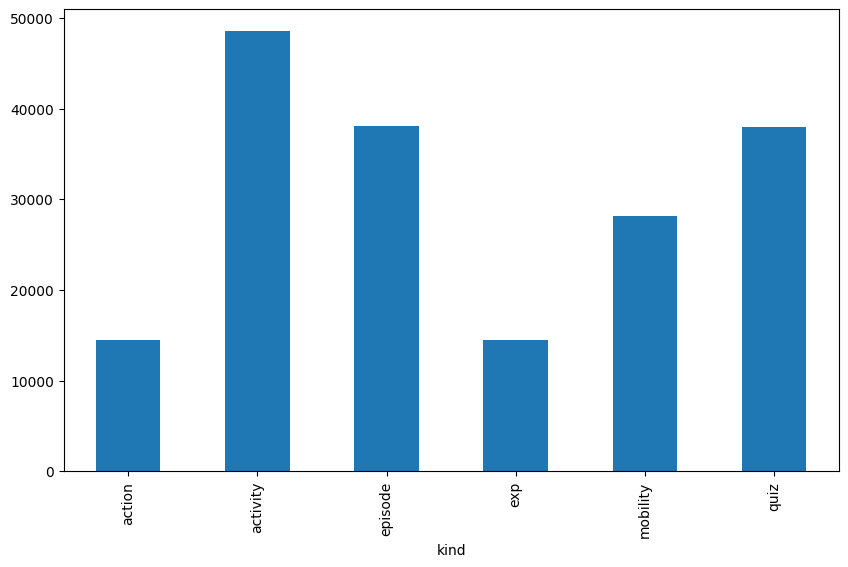

In [5]:
plt.figure(figsize=(10, 6))

df.groupby('kind', observed=True).size().plot(kind='bar')

<Axes: title={'center': 'Number of missions per user'}, xlabel='Number of missions', ylabel='Number of users'>

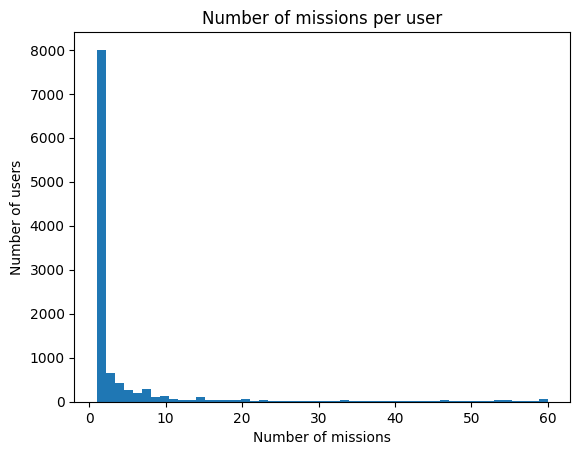

In [6]:
df.groupby('user', observed=True)['createdAt'].nunique().plot.hist(bins=50,title='Number of missions per user',xlabel='Number of missions',ylabel='Number of users')

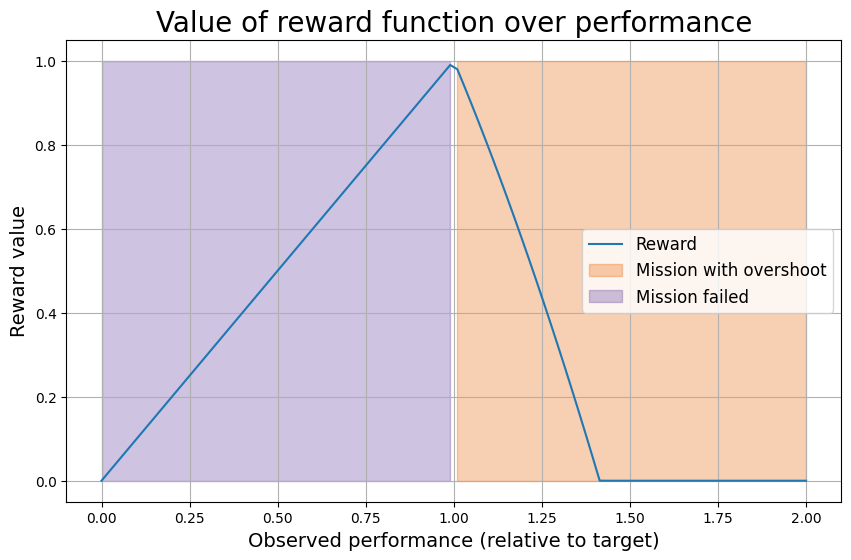

In [7]:
import numpy as np

def reward(x):
    if x <= 1:
        return x
    return np.maximum(0, 2 - np.power(x, 2))

x = np.linspace(0, 2, 100)
y = [reward(i) for i in x]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.title('Value of reward function over performance', fontsize=20)
plt.plot(x, y, label='Reward')
plt.fill_between(x, [1] * len(x), alpha=0.3, color='#E66100', where = x >= 1, label='Mission with overshoot')
plt.fill_between(x, [1] * len(x), alpha=0.3, color='#5D3A9B', where = x <= 1, label='Mission failed')
plt.legend(fontsize=12)
plt.xlabel('Observed performance (relative to target)', fontsize=14)
plt.ylabel('Reward value', fontsize=14)
plt.grid()
plt.savefig('out/reward_function.pdf', format='pdf')
plt.show()